In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime


%config InlineBackend.figure_format = 'svg'

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')  # 忽略一些warnings

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout, MaxPool2D
from tensorflow import keras
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import cv2
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)
import logging
# 打印进度
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')
from time import time

0.1.0


In [4]:
# 这个玩意还需要转换成灰度图才能检测？？

def StaticDetect(filename):
    # 定义xml文件位置
    haar_front_face_xml = './model/haarcascade_frontalface_default.xml'
    
    # 创建一个级联分类器，加载一个.xml分类器文件
    # 它既可以是Haar特征也可以是其他特征，例如LBP特征的分类器
    face_cascade = cv2.CascadeClassifier(haar_front_face_xml)

    # 加载图像
    img = cv2.imread(filename)
    # 转换为灰度图
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 进行人脸检测，传入scaleFactor，minNeighbors，
    # 分别表示人脸检测过程中每次迭代时图像的压缩率以及
    # 每个人脸矩形保留近似数目的最小值
    # 返回人脸矩形数组
    faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
    for (x, y, w, h) in faces:
        # 在原图像上绘制矩形
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    plt.figure(figsize=(10, 6))
    img = img[:,:,[2,1,0]]
    plt.xticks(())
    plt.yticks(())
    plt.imshow(img)


In [5]:
def plot_gallery(n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(3* n_col, 4* n_row))
    # plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    plt.tight_layout() #实现子图集合铺满
    plt.subplots_adjust(wspace=0, hspace=0)
    for i in range(n_row * n_col):
        
        filename = './celebrities/bollywood_celeb_faces_0/Asin/%s.jpg'%(60+i+1)
        haar_front_face_xml = './model/haarcascade_frontalface_default.xml'
        face_cascade = cv2.CascadeClassifier(haar_front_face_xml)
        img = cv2.imread(filename)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray_img, 1.2, 5)
        for (x, y, w, h) in faces:
        # 在原图像上绘制矩形
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=4)
        plt.subplot(n_row, n_col, i + 1)
        # RGB转换为BGR
        img = img[:,:,[2,1,0]]
        plt.imshow(img)
        plt.xticks(())
        plt.yticks(())

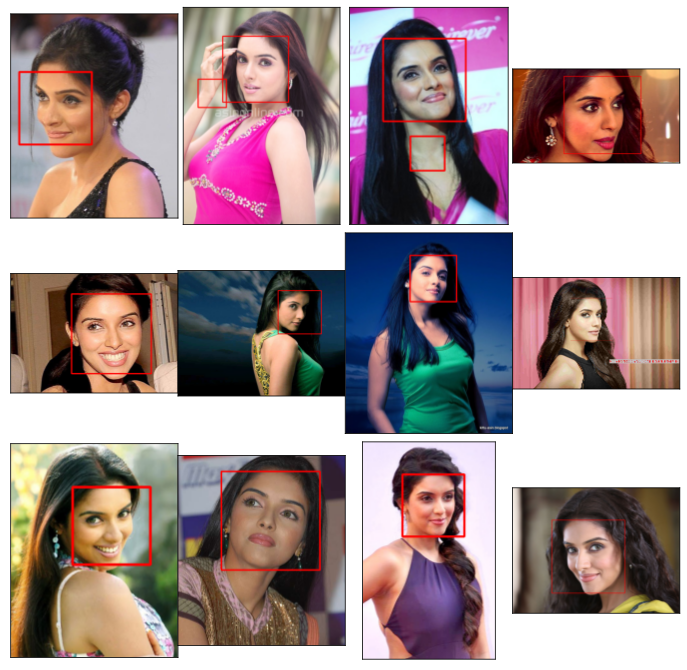

In [87]:
plot_gallery()

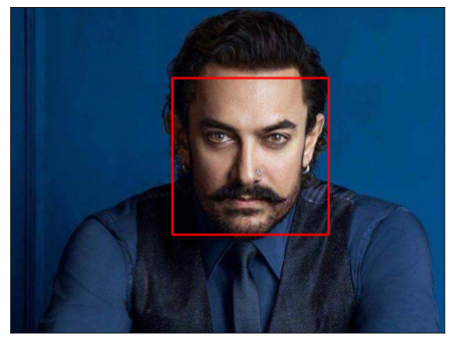

In [23]:
filename = './celebrities/bollywood_celeb_faces_0/Aamir_Khan/1.jpg'
# filename = './celebrities/bollywood_celeb_faces_0/Asin/66.jpg'
# filename = './img/fig4.jpg'
StaticDetect(filename)
# plt.savefig("./figures/har1.png", dpi=800)


'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

(450, 600, 3)


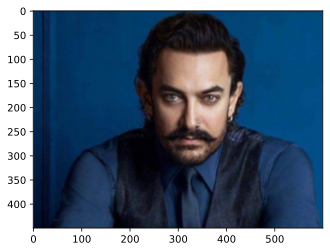

In [115]:
img = cv2.imread('./celebrities/bollywood_celeb_faces_0/Aamir_Khan/1.jpg')
print(img.shape)
plt.imshow(img[:,:,[2,1,0]], cmap = 'gray', interpolation = 'bicubic')
# plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [137]:
from PIL import Image
from mtcnn.mtcnn import MTCNN

filename = './celebrities/bollywood_celeb_faces_0/Aamir_Khan/1.jpg'
image = Image.open(filename)
image = image.convert('RGB')
pixels = np.asarray(image)

In [138]:
pixels.shape

(450, 600, 3)

In [139]:
detector = MTCNN()
results = detector.detect_faces(pixels)
results

[{'box': [234, 81, 172, 238],
  'confidence': 0.9992807507514954,
  'keypoints': {'left_eye': (288, 181),
   'right_eye': (367, 181),
   'nose': (331, 239),
   'mouth_left': (293, 269),
   'mouth_right': (359, 269)}}]

In [140]:
# x1, y1是人脸左下角的坐标，后两个参数是人脸的宽和高
x1, y1, width, height = results[0]['box']
# 有时候会返回负像素索引，我们认为这是一个bug，可以通过取坐标的绝对值来解决这一问题
x1, y1 = abs(x1), abs(y1)
# x2, y2是人脸的右上角
x2, y2 = x1 + width, y1 + height

# 索引提取人脸
face  =  pixels[y1:y2, x1:x2]

# 将人脸部分的尺寸变为FaceNet模型需要的输入大小
required_size=(160,  160)


In [143]:
face.shape

(238, 172, 3)

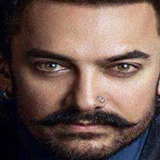

In [146]:
# fromarray函数把ndarray格式转为图片格式
image  =  Image.fromarray(face)
# 需要转成图片格式再resize，相当于压缩图片
image  =  image.resize(required_size)
# 再转成ndarray
face_array  =  np.asarray(image)
image

In [147]:
face_array.shape

(160, 160, 3)

In [148]:
from os import listdir
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [150]:
def extract_face(filename,  required_size=(160,  160)):
    # 读取图片，以NumPy数组的形式加载图像
    image = Image.open(filename)
    # 转换为RGB格式，以防图像出现alpha通道或变成黑白
    image = image.convert('RGB')
    # 转换为数组
    pixels = np.asarray(image)
    # 利用默认的权重定义检测器
    detector = MTCNN()
    # 检测图片中的人脸
    results = detector.detect_faces(pixels)
    # print(results)
    # 结果是一个边界框列表，其中每个边界框定义了边界框的左下角，以及宽度和高度
    # 如果我们假设照片中只有一张人脸用于实验，那我们就取出第一个边界框
    x1, y1, width, height = results[0]['box']
    # 有时候会返回负像素索引，我们认为这是一个bug，可以通过取坐标的绝对值来解决这一问题
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # 使用这些坐标来提取人脸
    face  =  pixels[y1:y2, x1:x2]
    # 将人脸部分的尺寸变为FaceNet模型需要的输入大小
    image  =  Image.fromarray(face)
    image  =  image.resize(required_size)
    face_array  =  np.asarray(image)
    # 返回结果
    return  face_array

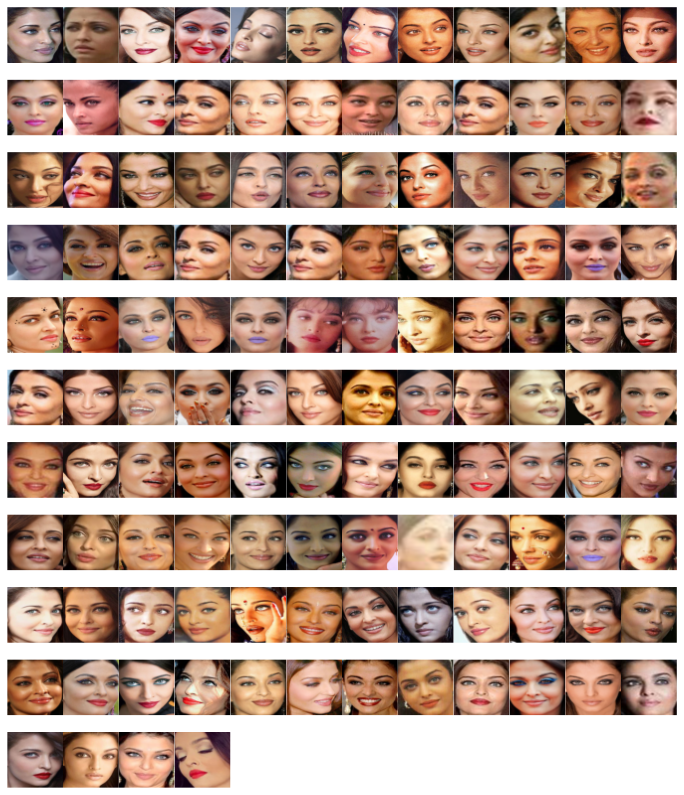

In [154]:
folder = './data/train/Aishwarya_Rai/'
i = 1
# 遍历文件
plt.figure(figsize=(12, 16))

plt.tight_layout() #实现子图集合铺满
plt.subplots_adjust(wspace=0, hspace=0)
for filename in listdir(folder):
    # 图片路径
    path = folder + filename
    # 获取人脸
    face = extract_face(path)
    # print(i, face.shape)
    # 绘图
    plt.subplot(12, 12, i)
    plt.axis('off')

    # face = face[:,:,[2,1,0]]
    plt.imshow(face)
    i += 1

plt.show()

In [7]:
a = np.array([[1,2,3,4], [5,6,7,8]])
a.mean()

4.5

**FaceNet**

In [76]:
data = np.load('data_bw-embeddings.npz')
trainX, trainy, testX, testy =  data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

Dataset: train=1065, test=452


In [77]:
trainX

array([[ 0.11793215, -1.0819373 ,  0.6932842 , ...,  0.8619324 ,
         0.06182562, -1.0358691 ],
       [-0.21219587, -1.7124861 ,  0.38990963, ...,  1.3996773 ,
         0.23434371, -0.47104648],
       [-0.8625355 , -2.2219255 ,  1.0949137 , ...,  1.5287503 ,
        -0.15327373,  0.31223324],
       ...,
       [ 0.9782586 ,  0.6768005 , -0.99109596, ..., -0.38352254,
        -1.34412   ,  0.8547657 ],
       [-0.9258677 , -0.15886456, -0.2347557 , ..., -0.592137  ,
        -1.5365201 ,  1.7774945 ],
       [-0.26484868, -0.21673413, -0.1746262 , ..., -0.56230545,
        -2.41892   ,  1.0889829 ]], dtype=float32)

In [15]:
# 下一步是对人脸嵌入向量进行归一化，使得向量的幅值为1：
# l2-normalization
from sklearn.preprocessing import Normalizer
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

In [60]:
# one-hot encoding
# perform one-hot encoding on train label
from sklearn.preprocessing import OneHotEncoder 
print(trainy.shape) #a list without second shape
print(trainy.reshape(-1, 1).shape) #change to a 2d array
encoder = OneHotEncoder()
trainy_hot = encoder.fit_transform(trainy.reshape(-1,1))
trainy_hot 
# trainy_hot is a sparse matrix, convert it to an ndarray
trainy_hot.toarray()

(1065,)
(1065, 1)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [61]:
# perform one hot encoding on test label
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder()
test_labels_hot = encoder.fit_transform(testy.reshape(-1,1))
test_labels_hot 
test_labels_hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# 下一步是将每个名人姓名的字符串目标变量转换为整数
from sklearn.preprocessing import LabelEncoder
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

In [25]:
from sklearn.svm import SVC
model = SVC()
model.fit(trainX, trainy)

SVC()

In [26]:
from sklearn.metrics import accuracy_score
# 预测
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# 评估准确率
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# 打印结果
print('Accuracy: train=%.3f, test=%.3f'  %  (score_train*100,  score_test*100))

Accuracy: train=100.000, test=98.009


In [27]:
# calculate the confusion matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(testy, yhat_test)
CM

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 57,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  3, 42,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0, 32,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 24,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, 23]], dtype=int64)

In [28]:
class_names = ['Arjun_Rampal', 'Arshad_Warsi', 'Asin', 'Ayushmann_Khurrana', 'Bhumi_Pednekar', 'Bipasha_Basu', 'Bobby_Deol', 'Deepika_Padukone', 'Disha_Patani', 'Emraan_Hashmi', 'Esha_Gupta', 'Farhan_Akhtar', 'Govinda']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (160, 160)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(testy, yhat_test, target_names=class_names))

                    precision    recall  f1-score   support

      Arjun_Rampal       1.00      1.00      1.00        31
      Arshad_Warsi       1.00      0.97      0.98        31
              Asin       0.98      1.00      0.99        45
Ayushmann_Khurrana       1.00      1.00      1.00        38
    Bhumi_Pednekar       0.97      1.00      0.98        32
      Bipasha_Basu       1.00      1.00      1.00        38
        Bobby_Deol       1.00      1.00      1.00        22
  Deepika_Padukone       0.90      0.98      0.94        58
      Disha_Patani       1.00      0.91      0.95        46
     Emraan_Hashmi       1.00      1.00      1.00        29
        Esha_Gupta       1.00      0.94      0.97        34
     Farhan_Akhtar       0.96      1.00      0.98        24
           Govinda       1.00      0.96      0.98        24

          accuracy                           0.98       452
         macro avg       0.99      0.98      0.98       452
      weighted avg       0.98      0.9

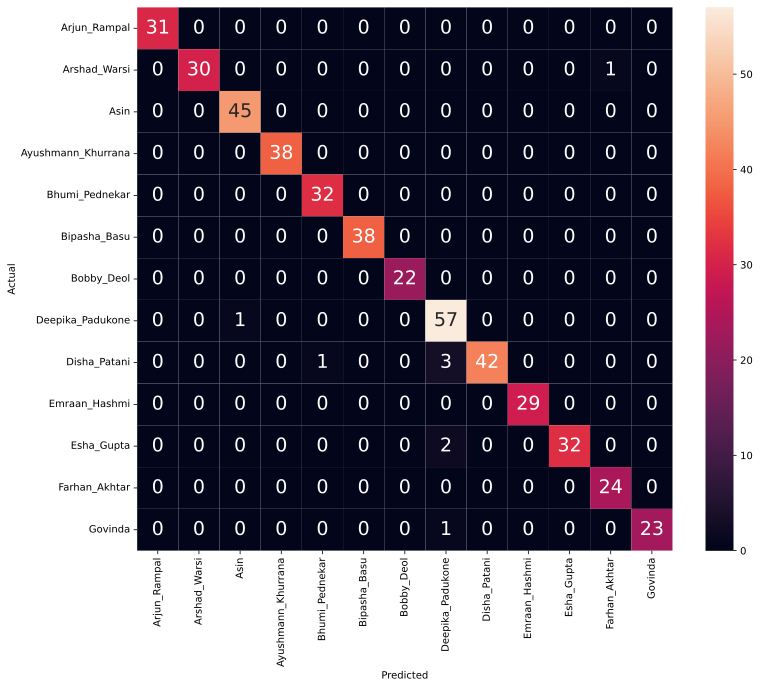

In [59]:
# plot the confusion matrix
# data = confusion_matrix(trainy, yhat_train)
data = confusion_matrix(testy, yhat_test)
df_cm = pd.DataFrame(data, columns=np.unique(testy), index = np.unique(testy))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (12, 10))
# sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 19}) 
# sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='d', annot_kws={"size": 19}) 
# sns.heatmap(df_cm, annot=True) 
plt.savefig("./figures/svm_confusion_test.png", dpi=800) 

In [19]:
min(trainy)

'Arjun_Rampal'

In [20]:
max(trainy)

'Govinda'

In [21]:
from sklearn.svm import SVC
model = SVC()
model.fit(trainX, trainy)

SVC()

In [23]:
from sklearn.metrics import accuracy_score
# 预测
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# 评估准确率
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# 打印结果
print('Accuracy: train=%.3f, test=%.3f'  %  (score_train*100,  score_test*100))

Accuracy: train=100.000, test=98.009


In [73]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                      patience=3, 
                      verbose=1, 
                      factor=0.7, 
                      min_lr=0)

tf.random.set_seed(4012)

model = Sequential()

model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(13, activation = "softmax"))
opt =  tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.0, decay=0.0, nesterov=False)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics=["accuracy"])
history = model.fit(trainX, trainy_hot.toarray(), batch_size=32, epochs=1000, validation_split = 0.2, callbacks=[learning_rate_reduction])

Epoch 1/1000
27/27 [==============================] - 1s 10ms/step - loss: 0.9713 - accuracy: 0.0939 - val_loss: 0.7051 - val_accuracy: 0.0094 - lr: 0.0050
Epoch 2/1000
27/27 [==============================] - 0s 8ms/step - loss: 0.9414 - accuracy: 0.1197 - val_loss: 0.7205 - val_accuracy: 0.0047 - lr: 0.0050
Epoch 3/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.9136 - accuracy: 0.1491 - val_loss: 0.7365 - val_accuracy: 0.0047 - lr: 0.0050
Epoch 4/1000
20/27 [=====================>........] - ETA: 0s - loss: 0.8907 - accuracy: 0.1984
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0034999999217689036.
27/27 [==============================] - 0s 7ms/step - loss: 0.8883 - accuracy: 0.1913 - val_loss: 0.7525 - val_accuracy: 0.0047 - lr: 0.0050
Epoch 5/1000
27/27 [==============================] - 0s 7ms/step - loss: 0.8586 - accuracy: 0.2171 - val_loss: 0.7683 - val_accuracy: 0.0047 - lr: 0.0035
Epoch 6/1000
27/27 [==============================] - 0s 7ms/step

In [65]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(18,5))

    # Plot accuracy
    plt.subplot(121)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_accuracy vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(122)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.subplots_adjust()
    plt.tight_layout()
    plt.legend()
    plt.show()

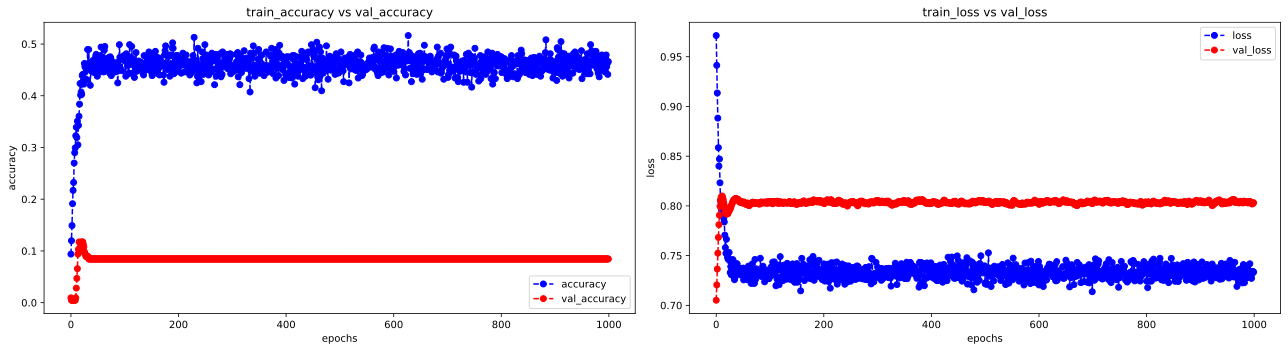

In [74]:
plot_accuracy_loss(history)

In [75]:
# evaluate on the test set
test_loss = model.evaluate(testX, test_labels_hot.toarray())
test_loss

15/15 [==============================] - 0s 3ms/step - loss: 0.6418 - accuracy: 0.6637


[0.6418360471725464, 0.6637167930603027]